In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from astropy.coordinates import get_sun, AltAz, EarthLocation
from astropy.time import Time
import numpy as np
from astropy import units as u

In [11]:
def getSunPos():
    lat = 46.8768628
    lon = 7.6212138
    start = Time("2022-10-25") + 8 * u.hour
    
    duration = 2 * 3600
    
    samples = 60

    dTimeArr = np.arange(0, duration, 3600 / samples) * u.hour / 3600
    timeArr = start + dTimeArr

    loc = EarthLocation(lon=lon*u.deg, lat=lat*u.deg)
    altaz = AltAz(obstime=timeArr, location=loc)
    
    sunPos = get_sun(timeArr).transform_to(altaz)

    return dTimeArr, sunPos.az.degree, sunPos.alt.degree

In [12]:
tree_img = cv2.imread('C:/Users/patri/OneDrive/Bilder/Tree/IMG_0671.JPG')
plt.imshow(tree_img)

KeyboardInterrupt: 

In [ ]:
distance = 5
pos_az = 10

img_az = 135
img_alt = 43

sun_pos = getSunPos()

sun_az = sun_pos[1]
sun_alt = sun_pos[2]
sun_size_deg = 0.533

res_x = tree_img.shape[1]
res_y = tree_img.shape[0]
pix_deg = res_x / 65

print(sun_alt)

[16.87600506 17.00617497 17.13592613 17.26525585 17.39416145 17.52264022
 17.65068945 17.77830643 17.90548843 18.03223272 18.15853655 18.28439719
 18.40981186 18.53477782 18.65929227 18.78335246 18.90695559 19.03009886
 19.15277948 19.27499464 19.39674152 19.5180173  19.63881915 19.75914424
 19.87898972 19.99835275 20.11723047 20.23562003 20.35351855 20.47092316
 20.58783098 20.70423913 20.82014472 20.93554486 21.05043664 21.16481716
 21.27868351 21.39203278 21.50486204 21.61716837 21.72894884 21.84020052
 21.95092048 22.06110577 22.17075345 22.27986058 22.3884242  22.49644136
 22.60390911 22.71082449 22.81718454 22.92298629 23.02822678 23.13290304
 23.23701212 23.34055103 23.4435168  23.54590648 23.64771708 23.74894564
 23.84958917 23.94964472 24.04910931 24.14797996 24.24625372 24.3439276
 24.44099865 24.5374639  24.63332038 24.72856514 24.82319522 24.91720766
 25.0105995  25.10336781 25.19550963 25.28702202 25.37790205 25.46814679
 25.5577533  25.64671866 25.73503997 25.8227143  25.

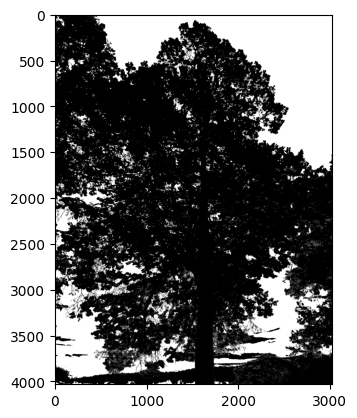

In [ ]:
lower_bound = np.array([200, 0, 0])
upper_bound = np.array([360, 220, 220])

mask = cv2.inRange(tree_img, lower_bound, upper_bound)

#cv2.imshow('treemask', imagemask)
plt.imshow(mask, cmap='gray')

In [ ]:
cv2.imwrite("C:/Users/patri/OneDrive/Bilder/Tree/test_tree_gray.jpg", mask)

True

In [ ]:
sun_az_rel = sun_az - img_az
sun_alt_rel = sun_alt - img_alt

center_x = sun_az_rel * pix_deg
center_y = sun_alt_rel * pix_deg

pos_x = (res_x / 2 + center_x).astype(int)
pos_y = (res_y / 2 - center_y).astype(int)
shape = (1,2)
coords = np.stack((pos_x, pos_y), axis=-1)
print(coords)

sun_size = int(sun_size_deg * pix_deg)

[[1287 3231]
 [1297 3225]
 [1307 3219]
 [1317 3213]
 [1328 3207]
 [1338 3201]
 [1348 3195]
 [1358 3189]
 [1368 3183]
 [1378 3177]
 [1389 3171]
 [1399 3165]
 [1409 3160]
 [1420 3154]
 [1430 3148]
 [1440 3142]
 [1451 3136]
 [1461 3131]
 [1471 3125]
 [1482 3119]
 [1492 3114]
 [1503 3108]
 [1513 3102]
 [1524 3097]
 [1534 3091]
 [1545 3086]
 [1555 3080]
 [1566 3075]
 [1577 3069]
 [1587 3064]
 [1598 3058]
 [1609 3053]
 [1619 3047]
 [1630 3042]
 [1641 3037]
 [1652 3031]
 [1662 3026]
 [1673 3021]
 [1684 3016]
 [1695 3010]
 [1706 3005]
 [1717 3000]
 [1728 2995]
 [1739 2990]
 [1750 2985]
 [1761 2979]
 [1772 2974]
 [1783 2969]
 [1794 2964]
 [1805 2959]
 [1816 2954]
 [1827 2950]
 [1838 2945]
 [1849 2940]
 [1860 2935]
 [1872 2930]
 [1883 2925]
 [1894 2921]
 [1905 2916]
 [1917 2911]
 [1928 2906]
 [1939 2902]
 [1951 2897]
 [1962 2893]
 [1974 2888]
 [1985 2883]
 [1996 2879]
 [2008 2874]
 [2019 2870]
 [2031 2866]
 [2043 2861]
 [2054 2857]
 [2066 2852]
 [2077 2848]
 [2089 2844]
 [2101 2840]
 [2112 2835]

In [ ]:
circle_masks = np.array(np.array([np.zeros_like(mask)]))
i=0
for coord in coords:
    circle_masks = np.append(circle_masks, [cv2.circle(np.zeros_like(mask), coord, sun_size//2, 255, -1)], axis=0)
    i+=1
    print(i)

plt.imshow(circle_masks[2], cmap='gray')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


KeyboardInterrupt: 

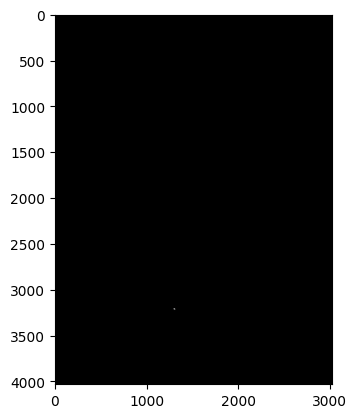

In [ ]:
tree_cut = mask * circle_masks

plt.imshow(tree_cut[3], cmap='gray')

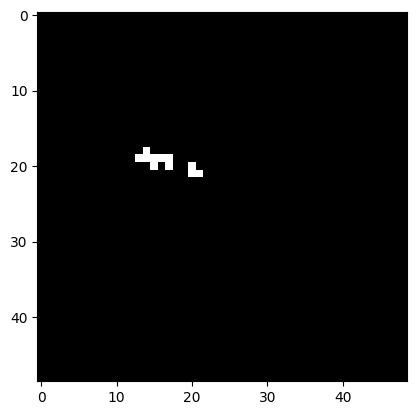

In [ ]:
plt.imshow(tree_cut[1][pos_y[1]-sun_size:pos_y[1]+sun_size+1, pos_x[1]-sun_size:pos_x[1]+sun_size+1], cmap='gray')

[0.02494331 0.10204082 0.39002268 0.62585034 0.31519274 0.07482993
 0.31746032 0.44897959 0.30385488 0.23582766 0.34240363 0.2585034
 0.21768707 0.39909297 0.24263039 0.01360544 0.02494331 0.40816327
 0.60997732 0.64852608 0.29251701 0.02947846 0.02040816 0.02267574
 0.         0.01587302 0.02947846 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00453515 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00453515 0.00907029 0.00453515 0.         0.
 0.         0.07029478 0.44217687 0.44444444 0.07709751 0.01587302
 0.00907029 0.         0.00680272 0.         0.01133787 0.00226757
 0.         0.         0.         0.         0.         0.
 0.00226757 0.12698413 0.43764172 0.3877551  0.22902494 0.0861678
 0

C:\Users\patri\AppData\Local\Temp\ipykernel_17500\176257160.py:2: RuntimeWarning: invalid value encountered in divide
  lai = np.delete((np.apply_over_axes(np.sum, tree_cut, [1,2]) / np.apply_over_axes(np.sum, circle_masks, [1,2]) * 255).reshape(-1),0)


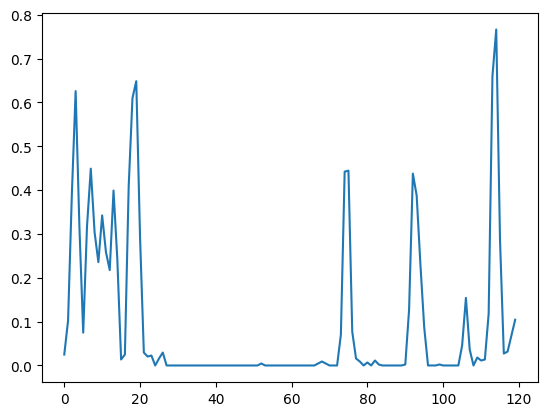

In [ ]:
np.set_printoptions(threshold=1000)
lai = np.delete((np.apply_over_axes(np.sum, tree_cut, [1,2]) / np.apply_over_axes(np.sum, circle_masks, [1,2]) * 255).reshape(-1),0)
print(lai)
plt.plot(lai)